In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Inisialisasi libary yang dibutuhkan, library numpy untuk operasi numerik, pandas untuk manipulasi data, matplotlib untuk visualisasi, sklearn untuk implementasi atau membangun model Regresi KNN

In [2]:
df = pd.read_csv('MaterialStrength.csv')

# Display the first few rows of the dataset to understand its structure
print(df.head())


      x1     x2   x3     x4   x5      x6     x7   x8        x9    x10  \
0  540.0    0.0  0.0  162.0  2.5  1040.0  676.0   28  0.300000  540.0   
1  540.0    0.0  0.0  162.0  2.5  1055.0  676.0   28  0.300000  540.0   
2  332.5  142.5  0.0  228.0  0.0   932.0  594.0  270  0.685714  475.0   
3  332.5  142.5  0.0  228.0  0.0   932.0  594.0  365  0.685714  475.0   
4  198.6  132.4  0.0  192.0  0.0   978.4  825.5  360  0.966767  331.0   

        x11  x12       x13  x14  x15  target_feature  
0  1.538462    1  0.350044  YEs   NO           79.99  
1  1.560651    1  0.452416  yES  nOO           61.89  
2  1.569024    0  6.704743  yEs   NO           40.27  
3  1.569024    0  8.891596  yes  NOO           41.05  
4  1.185221    0  8.126411  YeS   no           44.30  


Membaca dataset MaterialStrength.csv dan menampilkan 5 baris data utama pada dataset

In [3]:
# Check for missing values
print(df.isnull().sum())

x1                0
x2                0
x3                0
x4                0
x5                0
x6                0
x7                0
x8                0
x9                0
x10               0
x11               0
x12               0
x13               0
x14               0
x15               0
target_feature    0
dtype: int64


Mengecek pada setiap kolom apakah ada yang mengandung missing values apa tidak ada

In [4]:
print(df.columns)

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'Class'],
      dtype='object')


Menampilkan semua nama kolom pada dataset

In [4]:
X = df.drop('target_feature', axis=1)  
y = df['target_feature']  

Mengatur fitur X(independent variabel) dan Y (dependent variabel) . X disini yang digunakan semua kolom(x1,x2,x3,dan lain lain) kecuali Class, sedangkan pada Y yang digunakan adalah Class.

In [5]:
# Identify categorical columns (object type)
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_cols)

Categorical Columns: ['x14', 'x15']


Mengidentifikasi dan menampilkan kolom kategorikal

In [6]:
ct = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'  
)


Bagian untuk mengkonversi kolom kategorikal ke numerik dan memastikan kolom-kolom lain dalam dataset tidak terpengaruh oleh proses transformasi pada fitur

In [7]:
X = ct.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Bagian untuk transformasi fitur dan membagi dataset yang digunakan data training 80% dan testing 20%

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Pakai StandarScaler untuk melakukan scaling pada fitur agar berada dalam rentang yang sama secara standar.
Pakai fit_transform pada training buat menghitung standar deviasi dan menghitung rata-rata. Dan pakai transform pada testing agar dapat memiliki skala yang sama tidak perlu menghitung ulang deviasi dan rata-rata.

In [13]:
# K-Nearest Neighbors Regressor (KNN)
knn_regressor = KNeighborsRegressor(n_neighbors=5)  
knn_regressor.fit(X_train, y_train)
y_pred_knn = knn_regressor.predict(X_test)

# Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred_lr = linear_regressor.predict(X_test)

# Polynomial Regression (Basis Function Regression)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_regressor = LinearRegression()
poly_regressor.fit(X_train_poly, y_train)
y_pred_poly = poly_regressor.predict(X_test_poly)

Training model Classfication KNN pakai data training dengan menggunakan nilai neighbors terdekat = 5, Linear Regression, dan Polynomial Regression(Basis Function Regression) serta melakukan prediksi pada ketiga regressi tersebut

In [14]:
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name}:\nMSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}\n")


evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors Regression")


evaluate_model(y_test, y_pred_lr, "Linear Regression")


evaluate_model(y_test, y_pred_poly, "Polynomial Regression")




K-Nearest Neighbors Regression:
MSE: 150.00, RMSE: 12.25, R²: 0.42

Linear Regression:
MSE: 75.53, RMSE: 8.69, R²: 0.71

Polynomial Regression:
MSE: 54.26, RMSE: 7.37, R²: 0.79



Pada hasil metrik-metrik pada ketiga regressi dapat disimpulkan bahwa yang memiliki hasil terbaik adalah Polynomial Regression(basis function), karena nilai pada MSE dan RMSE hasilnya terendah, dan pada R^2 nya tinggi 79% yang berarti model tersebut cukuo baik dalam menjelaskan hubungan antara variabel input dan output. 

Untuk regresi KNN hasil MSE dan RMSE sangat buruk dan kurang cocok untuk kasus pada dataset tersebut, dan linear regression memiliki hasil metrik cukup baik namun tidak sebaik Polynomial

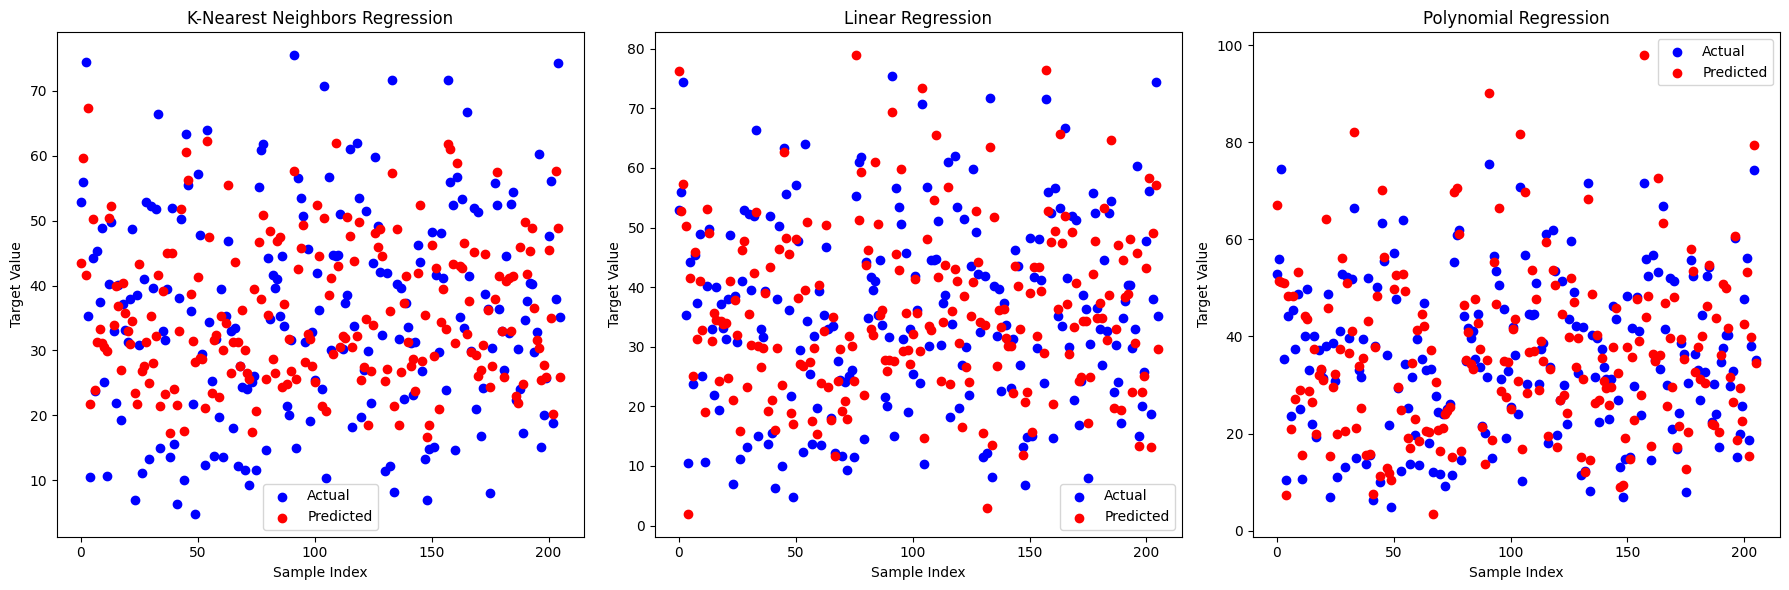

In [11]:
plt.figure(figsize=(18, 6))


plt.subplot(1, 3, 1)
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_test)), y_pred_knn, color='red', label='Predicted')
plt.title('K-Nearest Neighbors Regression')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()


plt.subplot(1, 3, 2)
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_test)), y_pred_lr, color='red', label='Predicted')
plt.title('Linear Regression')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()


plt.subplot(1, 3, 3)
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_test)), y_pred_poly, color='red', label='Predicted')
plt.title('Polynomial Regression')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()


plt.tight_layout()
plt.show()

Pada perbandingan hasil ketiga visual tersebut dapat disimpulkan bahwa hasil perfoma terbaik diantara ketiga regresi tersebut adalah Polynomial Regression(basis function), karena cukup banyak titik merah(predicted) mendekati titik biru(actual). Untuk regresi KNN memiliki hasil perfoma buruk karena titik merah dan birunya pada bertebaran yang berarti nilai predicted menjauhi dari nilai actual. Sedangkan Linear regression hasil perfomanya lebih baik daripada regresi KNN tetapi kurang stabil daripada Polynomial Regression(basis function)